In [1]:
%load_ext autoreload
%autoreload 2

from xaj import odeint
from jax import numpy as np

In [2]:
def rhs(x, y):
    return y

def run(x, y):
    return (x < 4) & (y < 2.5)

x0 = 0
y0 = 1

In [3]:
ns = odeint(rhs, x0, y0, 1, atol=0, rtol=1e-3, filter=run)

In [4]:
x  = np.linspace(-5, 5, num=101)
yn = ns(x)
ya = np.exp(x)

jit(masked_do); input: Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> [Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)>]
All equations were filtered out
jit(masked_do); input: Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> [Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)>, Tr

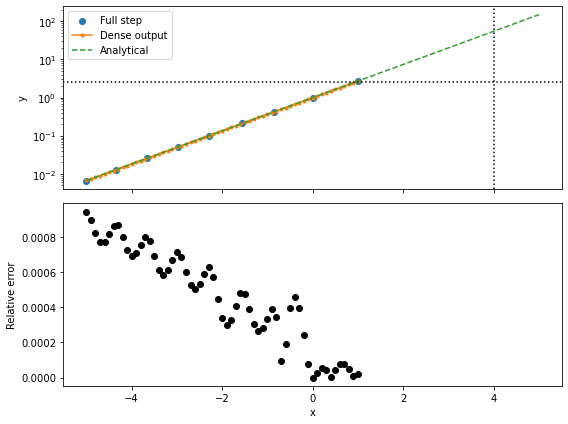

In [5]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2,1, figsize=(8,6), sharex=True)

axes[0].scatter(ns.xs, ns.ys, color='C0', label='Full step')
axes[0].plot(x, yn, '.-',     color='C1', label='Dense output')
axes[0].plot(x, ya, '--',     color='C2', label='Analytical')
axes[1].scatter(x, abs(yn-ya) / ya, color='k')

axes[0].axvline(x=4,   ls=':', color='k')
axes[0].axhline(y=2.5, ls=':', color='k')
axes[0].legend()
axes[0].set_yscale('log')
axes[0].set_ylabel('y')
axes[1].set_ylabel('Relative error')
axes[1].set_xlabel('x')

fig.tight_layout()